In [1]:
import numpy as np
import pandas as pd
np.random.seed(5)

In [2]:
class SVR:
    
    def __init__(self, C=1, gamma='scale', alpha=0.001, max_iter=100):
        
        self.C = C
        self.gamma = gamma
        self.alpha = alpha
        self.max_iter = max_iter
        self.weights = None
        self.intercept = None
        
    def fit(self, X, y):
        
        self.intercept = np.ones((X.shape[0], 1))
        X = np.concatenate((self.intercept, X), axis=1)
        self.weights = np.random.normal(size=(X.shape[1], 1))

        for i in range(self.max_iter):
            
            fx = np.dot(X, self.weights)
            cost = self.cost(y, fx)
            gradients = self.__gradient(self.weights, y,fx)
            self.weights += self.alpha * gradients
            
    
    def predict(self,X):
        
        X = np.concatenate((self.intercept, X), axis=1)
        return np.dot(X, self.weights)
    
    def __gradient(self, w, y, fx):
        
        grads = list(map(lambda m: 0 if m>=1 else -m,np.multiply(fx,y)))
        return (self.C * np.sum(grads)) - ( 2 * w )
    
    def cost(self, y, fx):
        
        cost = list(map(lambda m: 0 if m>=1 else 1-m,np.multiply(fx,y)))
        return self.C*np.dot(self.weights.T, self.weights) + np.sum(cost)
    

In [3]:
x = np.linspace(1,10,100)
y = 1 + 2*x
y = np.reshape(y,(100,1))
x = np.reshape(x,(100,1))

In [4]:
model = SVR(max_iter=1000)
model.fit(x,y)

In [5]:
print(model.cost(y,model.predict(x)))

[[0.17714211]]


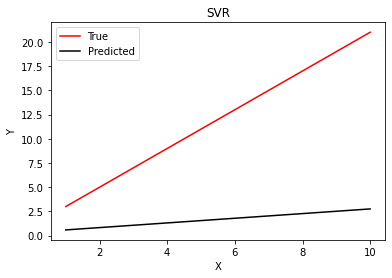

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x, y, c='r')
plt.plot(x, model.predict(x), c='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['True', 'Predicted'])
plt.title('SVR')
plt.show()

/home/hassan/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


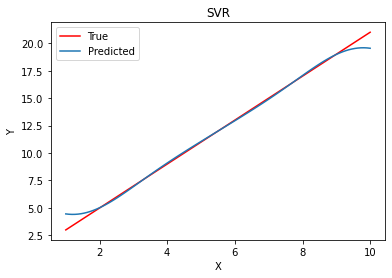

In [7]:
from sklearn.svm import SVR
sk_model = SVR()
sk_model.fit(x,y)
plt.plot(x, y, c='r')
plt.plot(x, sk_model.predict(x))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['True', 'Predicted'])
plt.title('SVR')
plt.show()

In [8]:
class SVC:
    def __init__(self, C=1, gamma='scale', alpha=0.001, max_iter=100):
        
        self.C = C
        self.gamma = gamma
        self.alpha = alpha
        self.max_iter = max_iter
        self.weights = None
        self.intercept = None
        
    def fit(self, X, y):
        
        self.intercept = np.ones((X.shape[0], 1))
        X = np.concatenate((self.intercept, X), axis=1)
        self.weights = np.random.normal(size=(X.shape[1], 1), )

        for i in range(self.max_iter):
            
            fx = np.dot(X, self.weights)
            cost = self.cost(y, fx)
            gradients = self.__gradient(self.weights, y,fx)
            self.weights += self.alpha * gradients
            
    
    def predict(self, X):
        
        X = np.concatenate((self.intercept, X), axis=1)
        preds = np.dot(X, self.weights)
        return list(map(lambda m: 1 if m>=1 else 0, preds)) #np.sign()
    
    def __gradient(self, w, y, fx):
        
        grads = list( map( lambda m: 0 if m>=1 else -m, np. multiply(fx, y) ) )
        return np.sum(grads) - ( 2 * self.C * w )
    
    def cost(self, y, fx):
        
        cost = list(map(lambda m: 0 if m>=1 else 1-m,np.multiply(fx,y)))
        return self.C*np.dot(self.weights.T, self.weights) + np.sum(cost)
    
    def __hot_encoding(self, y):
        encoded = set()
        for c in y:
            encoded.add(c)
        return list(encoded)
    def sig(self, p):
        return 1/((1+np.exp(-(p))) + 0.000000001)

In [9]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
y = df['Outcome']
x = df.drop(['Outcome'], axis=1)
y = y.values.reshape(-1,1)

In [11]:
l = SVC(max_iter=1000)
l.fit(x,y)

/home/hassan/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [12]:
l.predict(x)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [13]:
preds = np.reshape(l.predict(x), newshape=(-1,1) )
print(l.cost(y,preds))

[[1209.93687232]]
